In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
classes = []
path_data = '/content/drive/MyDrive/Data'
with os.scandir(path_data) as data_folder:
    for i in data_folder:
        if(i.is_file() == False):
            classes.append(i.name)
classes

['Politics', 'Crime', 'Entertainment', 'Science']

In [ ]:
classes=['Crime','Politics','Science','Entertainment']

In [ ]:
filename_in_class = {}
for i in classes:
    path_class = path_data +'/'+ i
    x = []
    with os.scandir(path_class) as class_folder:
        for j in class_folder:
            if(j.is_file()):
                x.append(j.name)
    filename_in_class[i] = x
    filename_in_class[i].sort()
for key, values in filename_in_class.items():
    print(key, len(values))

Crime 1100
Politics 3011
Science 4000
Entertainment 1053


In [ ]:
for i in range(len(classes)):
    x = filename_in_class[classes[i]]
    for j in x:
        for k in range(i+1, len(classes)):
            key = classes[k]
            if j in filename_in_class[key]:
                filename_in_class[key].remove(j)
k=[]
v=[]
for key, values in filename_in_class.items():
    print(key, len(values))
    k.append(key)
    v.append(len(values))

Crime 1100
Politics 3011
Science 2633
Entertainment 0


In [ ]:
print(filename_in_class.keys())

dict_keys(['Crime', 'Politics', 'Science', 'Entertainment'])


In [ ]:
data = {}
l = 0

for i in filename_in_class.keys() :
    file_name = filename_in_class[i]
    for j in file_name:
        if j in filename_in_class[i]:
            path_textfile = path_data +'/'+ i + '/' + j
            with open(path_textfile, "r", encoding = "latin1") as p:
                data[l] = p.readlines()
                l = l+1
            data[l-1] = [" ".join(data[l-1]), i] 

data = pd.DataFrame(data).T
data.columns = ['Text', 'Class']
data

,Text,Class
0,"\n Archive-name: ripem/faq\n Last-update: Sun,...",Crime
1,Approved: news-answers-request@MIT.EDU\n Conte...,Crime
2,Approved: news-answers-request@MIT.EDU\n Conte...,Crime
3,Message-ID: <1ppvai$l79@bilbo.suite.com>\n Rep...,Crime
4,\n Some sick part of me really liked that p...,Crime
...,...,...
6739,Distribution: world\n Message-ID: <cshotton-18...,Science
6740,\n Jeffrey L. Cook sez;\n >>This object would ...,Science
6741,Message-ID: <1tdqmvINN3q2@hp-col.col.hp.com>\n...,Science
6742,Message-ID: <1t6dd1$11v@network.ucsd.edu>\n Re...,Science


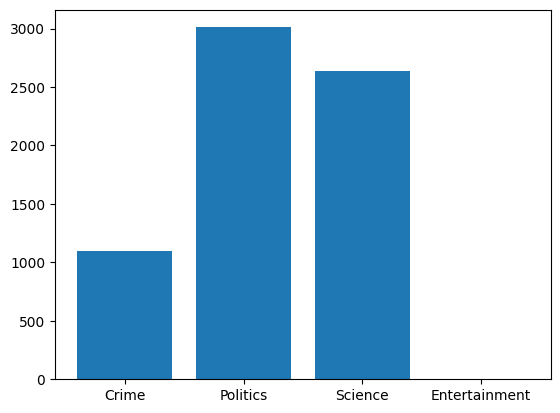

In [ ]:
plt.bar(k,v)
plt.show()

<Axes: >

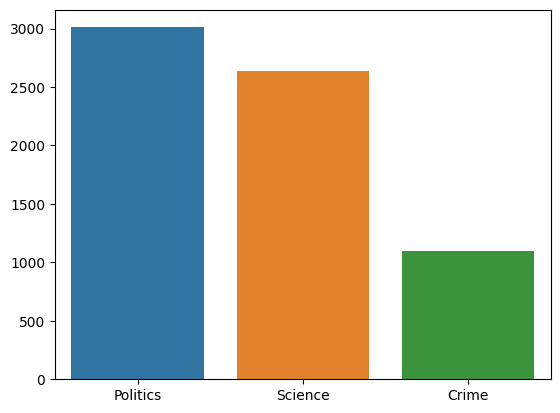

In [ ]:
class_frequencies = data['Class'].value_counts()
sns.barplot(x=class_frequencies.index, y=class_frequencies.values)

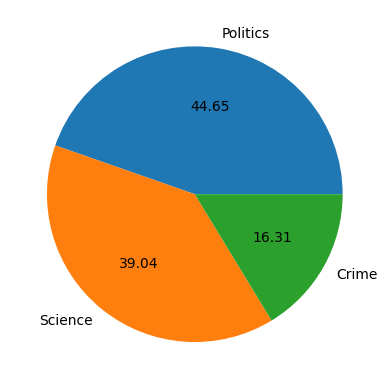

In [ ]:
plt.pie(data['Class'].value_counts(),labels=['Politics', 'Science','Crime' ],autopct="%0.2f")
plt.show()

In [ ]:
unique = list(data.Text.unique())
len(unique)

6581

In [ ]:
import nltk
nltk.download('popular')

import regex
from wordcloud import WordCloud
from nltk.corpus import stopwords 
from nltk.tokenize import WordPunctTokenizer
from string import punctuation
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()

stop = stopwords.words('english')

for punct in punctuation:
    stop.append(punct)

def filter_text(text, stop_words):
    word_tokens = WordPunctTokenizer().tokenize(text.lower())
    filtered_text = [regex.sub(u'\p{^Latin}', u'', w) for w in word_tokens if w.isalpha() and len(w) > 3]
    filtered_text = [wordnet_lemmatizer.lemmatize(w, pos="v") for w in filtered_text if not w in stop_words] 
    return " ".join(filtered_text)
data["filtered_text"] = data.Text.apply(lambda x : filter_text(x, stop)) 

data.head()

,Text,Class,filtered_text
0,"\n Archive-name: ripem/faq\n Last-update: Sun,...",Crime,archive name ripem last update post still rath...
1,Approved: news-answers-request@MIT.EDU\n Conte...,Crime,approve news answer request content type text ...
2,Approved: news-answers-request@MIT.EDU\n Conte...,Crime,approve news answer request content type text ...
3,Message-ID: <1ppvai$l79@bilbo.suite.com>\n Rep...,Crime,message bilbo suite reply miller suite nntp po...
4,\n Some sick part of me really liked that p...,Crime,sick part really like phrase actually merely t...


In [ ]:
paragraph_science="Subject: Exciting News in Space Exploration Dear Recipient, I wanted to share some exciting news with you about the latest development in space exploration. Recently, nasa announced that they have made significant progress in their mission to establish a sustainable human presence on the Moon by 2092. In a recent article posted on the nasa website, they outlined their plan to use the Space Launch System (SLS) to launch the Artemis mission to the Moon in 2024. This mission will pave the way for future missions that will eventually lead to the establishment of a lunar base. I find this work fascinating and think it has the potential to have a significant impact on our understanding of space and our ability to explore and utilize it. Additionally, I believe that the work being done by nasa can inspire people of all ages to think about the possibility of space exploration and the importance of investing in science. I hope this post finds you well and that you share my enthusiasm for the incredible work being done in space exploration. Thank you for your time and attention.Best regards,Your Name"


In [ ]:
paragraph_crime="I am writing to express my concerns about the safety and well-being of incarcerated individuals in our county jail. Sick inmates are being denied medical attention, and inhumane conditions are prevalent. Many of these individuals are merely a threat due to non-violent offenses, yet they face the possibility of long prison sentences. Mental health issues are not being addressed, leading to stone-crazy behavior and difficulties in functioning upon release. Overcrowding and violence are rampant, even for minor offenses. I urge action to ensure that all individuals are treated with dignity and respect."

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from string import punctuation
import re

wordnet_lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

for punct in punctuation:
    stop_words.add(punct)

def clean_paragraph(paragraph):
    words = word_tokenize(paragraph.lower())
    words = [word for word in words if word.isalpha() and len(word) > 3]
    words = [wordnet_lemmatizer.lemmatize(word, pos='v') for word in words if word not in stop_words]
    cleaned_paragraph = ' '.join(words)
    return cleaned_paragraph

cleaned_paragraph_science = clean_paragraph(paragraph_science)
print(cleaned_paragraph_science)
cleaned_paragraph_crime = clean_paragraph(paragraph_crime)
print(cleaned_paragraph_crime)


subject excite news space exploration dear recipient want share excite news latest development space exploration recently nasa announce make significant progress mission establish sustainable human presence moon recent article post nasa website outline plan space launch system launch artemis mission moon mission pave future missions eventually lead establishment lunar base find work fascinate think potential significant impact understand space ability explore utilize additionally believe work do nasa inspire people age think possibility space exploration importance invest science hope post find well share enthusiasm incredible work do space exploration thank time regard name
write express concern safety incarcerate individuals county jail sick inmates deny medical attention inhumane condition prevalent many individuals merely threat offenses face possibility long prison sentence mental health issue address lead behavior difficulties function upon release overcrowd violence rampant even

In [ ]:
data

,Text,Class,filtered_text
0,"\n Archive-name: ripem/faq\n Last-update: Sun,...",Crime,archive name ripem last update post still rath...
1,Approved: news-answers-request@MIT.EDU\n Conte...,Crime,approve news answer request content type text ...
2,Approved: news-answers-request@MIT.EDU\n Conte...,Crime,approve news answer request content type text ...
3,Message-ID: <1ppvai$l79@bilbo.suite.com>\n Rep...,Crime,message bilbo suite reply miller suite nntp po...
4,\n Some sick part of me really liked that p...,Crime,sick part really like phrase actually merely t...
...,...,...,...
6739,Distribution: world\n Message-ID: <cshotton-18...,Science,distribution world message cshotton reference ...
6740,\n Jeffrey L. Cook sez;\n >>This object would ...,Science,jeffrey cook object would interfere anyone enj...
6741,Message-ID: <1tdqmvINN3q2@hp-col.col.hp.com>\n...,Science,message reference jut amdahl nntp post host hp...
6742,Message-ID: <1t6dd1$11v@network.ucsd.edu>\n Re...,Science,message network ucsd reference ucsu colorado n...


In [ ]:
null_values = data.isnull()
null_values_count = null_values.sum()
null_values_count

Text             0
Class            0
filtered_text    0
dtype: int64

In [ ]:
data.to_csv('data.csv', index=False)

In [ ]:
data_test=data.drop(['Text'],axis=1)
data_test

,Class,filtered_text
0,Crime,archive name ripem last update post still rath...
1,Crime,approve news answer request content type text ...
2,Crime,approve news answer request content type text ...
3,Crime,message bilbo suite reply miller suite nntp po...
4,Crime,sick part really like phrase actually merely t...
...,...,...
6739,Science,distribution world message cshotton reference ...
6740,Science,jeffrey cook object would interfere anyone enj...
6741,Science,message reference jut amdahl nntp post host hp...
6742,Science,message network ucsd reference ucsu colorado n...


In [ ]:
new_data = pd.DataFrame({'Class': ['Science', 'Crime'], 'filtered_text': [paragraph_science, paragraph_crime]})
new_data

,Class,filtered_text
0,Science,Subject: Exciting News in Space Exploration De...
1,Crime,I am writing to express my concerns about the ...


In [ ]:
data_test = data_test.append(new_data)
data_test

<ipython-input-72-ff2144856bd7>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_test = data_test.append(new_data)


,Class,filtered_text
0,Crime,archive name ripem last update post still rath...
1,Crime,approve news answer request content type text ...
2,Crime,approve news answer request content type text ...
3,Crime,message bilbo suite reply miller suite nntp po...
4,Crime,sick part really like phrase actually merely t...
...,...,...
6741,Science,message reference jut amdahl nntp post host hp...
6742,Science,message network ucsd reference ucsu colorado n...
6743,Science,article well metares well flandern write kelvi...
0,Science,Subject: Exciting News in Space Exploration De...


In [ ]:
data_test = data_test.reset_index(drop=True)
data_test

,Class,filtered_text
0,Crime,archive name ripem last update post still rath...
1,Crime,approve news answer request content type text ...
2,Crime,approve news answer request content type text ...
3,Crime,message bilbo suite reply miller suite nntp po...
4,Crime,sick part really like phrase actually merely t...
...,...,...
6741,Science,message reference jut amdahl nntp post host hp...
6742,Science,message network ucsd reference ucsu colorado n...
6743,Science,article well metares well flandern write kelvi...
6744,Science,Subject: Exciting News in Space Exploration De...


In [ ]:
data_test.to_csv('data_test2.csv', index=False)